# Loading, Understanding, Cleaning data


In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#load dataset/read the data
data=pd.read_csv('/content/drug200.csv.csv')

#take a peek at the data
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
# Data overview / Get to know the data

print("Rows: ", data.shape[0])
print("Columns: ", data.shape[1])
print("\nFeatures: \n", data.columns.tolist())
print(" \nMissing Values: \n", data.isnull().sum().values.sum())
print("\nUnique Values: \n", data.nunique())

Rows:  200
Columns:  6

Features: 
 ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']
 
Missing Values: 
 0

Unique Values: 
 Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64


In [ ]:
# Data Analysis: EDA(Exploratory Data Analysis)

# Understand the data in each column of our dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
# Let's loook at describe() method for numerical feature of summary
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
# Checking null value in each column
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

# Data Preparation

We know that, from the features info, there are some features that in categorical and numerical.
For linear and logistic regression, need to cerate dummyfor categorical since those
model need to be in numeric variable . However, for DECISION TREE it is not
necessary, it still can process categorical variables easily. however, we still need to encode the categorical variables into a standard format so that sklearn can
understand them and build the tree. We'll do that using the LabelEncoder()class, which comes with sklearn.preprocessing.

In [ ]:
from sklearn import preprocessing

#encode categorical variable using label Encoder
#select all categorical variables
data_categorical=data.select_dtypes(include=['object'])
data_categorical.head()

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,drugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,drugY


In [ ]:
# apply label encoder to data_categorical

le = preprocessing.LabelEncoder()
data_categorical = data_categorical.apply(le.fit_transform)
data_categorical.head()

,Sex,BP,Cholesterol,Drug
0,0,0,0,4
1,1,1,0,2
2,1,1,0,2
3,0,2,0,3
4,0,1,0,4


In [ ]:
# Next, Concatenate df_categorical dataframe with original df (dataframe)

# first, Drop earlier duplicate columns which had categorical values
data = data.drop(data_categorical.columns,axis=1)
data = pd.concat([data,data_categorical],axis=1)
data.head()

,Age,Na_to_K,Sex,BP,Cholesterol,Drug
0,23,25.355,0,0,0,4
1,47,13.093,1,1,0,2
2,47,10.114,1,1,0,2
3,28,7.798,0,2,0,3
4,61,18.043,0,1,0,4


In [ ]:
# look at column type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Na_to_K      200 non-null    float64
 2   Sex          200 non-null    int64  
 3   BP           200 non-null    int64  
 4   Cholesterol  200 non-null    int64  
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [ ]:
# convert target variable drug to categorical
data["Drug"]=data['Drug'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          200 non-null    int64   
 1   Na_to_K      200 non-null    float64 
 2   Sex          200 non-null    int64   
 3   BP           200 non-null    int64   
 4   Cholesterol  200 non-null    int64   
 5   Drug         200 non-null    category
dtypes: category(1), float64(1), int64(4)
memory usage: 8.3 KB


# Model Building and Evaluation

In [ ]:
# Build decision tree with default hyperparametes, then use cross-
# validation to tune them

# Importing train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Putting independent variables/features to X
X = data.drop('Drug',axis=1)

# Putting response/dependent variable/feature to y
y = data['Drug']

In [ ]:
X.head()

,Age,Na_to_K,Sex,BP,Cholesterol
0,23,25.355,0,0,0
1,47,13.093,1,1,0
2,47,10.114,1,1,0
3,28,7.798,0,2,0
4,61,18.043,0,1,0


In [ ]:
y.head()

0    4
1    2
2    2
3    3
4    4
Name: Drug, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]

In [ ]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=99)

X_train.head()

,Age,Na_to_K,Sex,BP,Cholesterol
166,58,26.645,0,1,0
172,39,17.225,0,2,1
57,40,27.826,1,0,0
158,59,10.444,0,1,0
116,67,9.514,1,2,1


In [ ]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
data_default = DecisionTreeClassifier(max_depth=5)
data_default.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# making predictions
y_pred_default = data_default.predict(X_test)

# Printing classifier report after prediction
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       1.00      0.95      0.97        19
           4       0.96      1.00      0.98        24

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



In [ ]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[10  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  1]
 [ 0  0  0  0 24]]
0.9833333333333333


# Plotting the Decision Tree

In [ ]:
!pip install my-package
!pip install pydotplus
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
# Importing required packages for visualization
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz

# Putting features
features = list(data.columns[1:])
features

['Na_to_K', 'Sex', 'BP', 'Cholesterol', 'Drug']

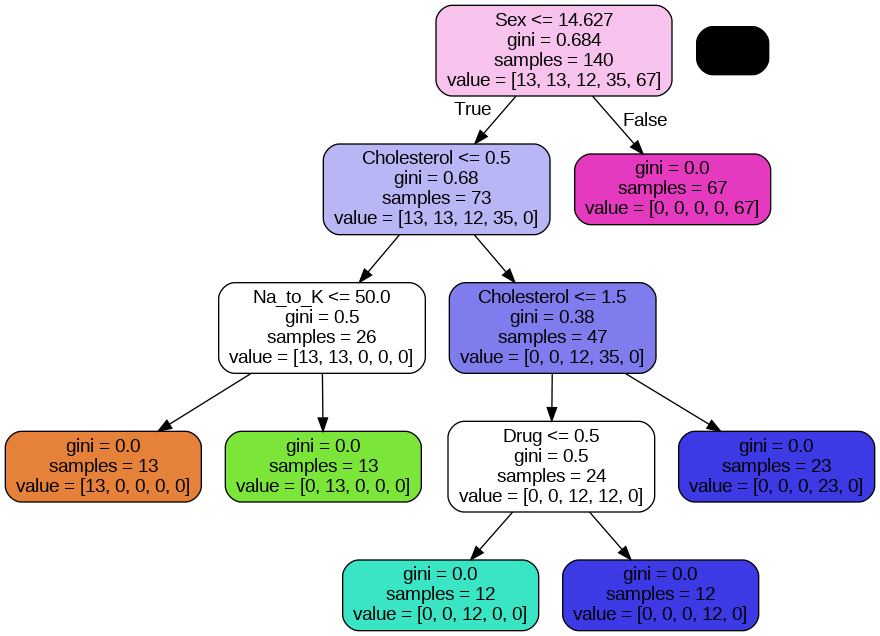

In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()
export_graphviz(data_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())